# 5.2 Exercises: Heat Maps, Spatial Charts, and Contour Charts
student: Rachel Nelson

class: DSC640-T302 Data Presentation & Visualization (2221-1)

In [2]:
# Import Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopy
import folium as folium


In [3]:
# Import data into dataframe
df = pd.read_csv('D:/College/DSC640/ex5-2/ex5-2/costcos-geocoded.csv')
df.head(4)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000


In [4]:
# Import data into dataframe
df2 = pd.read_csv('D:/College/DSC640/ex5-2/ex5-2/ppg2008.csv')
df2.describe()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000
mean,70.840000,36.288000,20.862000,7.464000,15.938000,0.469900,4.736000,5.858000,0.816200,1.190000,3.224000,0.34000,1.358000,4.51400,5.864000,3.858000,1.12600,0.598000,2.42000,2.464000
std,13.205379,2.307454,2.936532,1.142457,2.334383,0.041082,1.441479,1.867563,0.069174,0.833299,2.117137,0.14604,0.948057,1.77166,2.628165,2.204271,0.41982,0.581865,0.54735,0.549493
min,25.000000,29.900000,17.200000,5.200000,11.200000,0.410000,2.600000,2.800000,0.594000,0.000000,0.000000,0.00000,0.400000,1.90000,2.400000,1.400000,0.40000,0.100000,1.50000,1.400000
25%,67.000000,35.150000,18.650000,6.700000,14.200000,0.440000,3.600000,4.450000,0.781250,0.500000,1.750000,0.30850,0.700000,2.92500,3.650000,2.325000,0.90000,0.200000,2.00000,2.125000
50%,76.500000,36.650000,20.550000,7.300000,15.850000,0.465000,4.600000,5.650000,0.826000,1.100000,3.200000,0.35950,1.100000,4.20000,5.150000,3.400000,1.10000,0.300000,2.35000,2.500000
75%,79.750000,37.925000,22.150000,8.075000,17.150000,0.483000,5.775000,6.875000,0.863750,1.875000,5.075000,0.39550,1.750000,5.80000,7.575000,4.850000,1.27500,0.875000,2.80000,2.775000
max,82.000000,39.800000,30.200000,10.800000,22.000000,0.609000,9.000000,10.700000,0.952000,2.800000,7.000000,1.00000,4.300000,9.60000,13.800000,11.000000,2.80000,2.900000,3.90000,3.800000


In [5]:
#Pivot Data Frame

df2_unpivoted = df2.melt(id_vars=['Name  '], var_name='Metric', value_name='Value')
# Save file
df2_unpivoted.to_csv('D:/College/DSC640/ppg2008_unpivoted.csv',index=False)

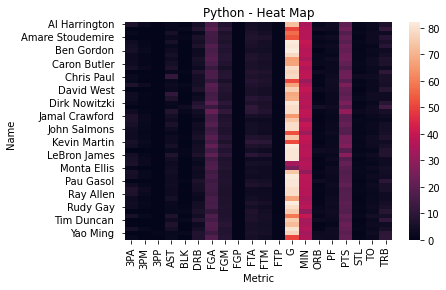

In [6]:
# Heat Map
heat = df2_unpivoted .pivot("Name  ", "Metric","Value")
plt.title('Python - Heat Map')
ax = sns.heatmap(heat)

Python - Spatial Chart

In [7]:
# Spatial Chart
import folium
map_it = folium.Map(location=[48, -102], zoom_start = 3)
locations = folium.map.FeatureGroup()
for lat, lng in zip(df.Latitude, df.Longitude):
    locations.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))
map_it.add_child(locations)

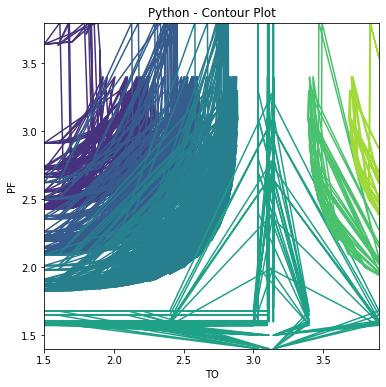

In [8]:
# 1 Contour Chart
#Create the contour plot
x = df2.TO
y = df2.PF
x, y = np.meshgrid(x, y)
z = np.sin(x)*np.cos(y)
[X, Y] = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(6,6))

ax.contour(x, y, z)
ax.set_title('Python - Contour Plot')
ax.set_xlabel('TO')
ax.set_ylabel('PF')

plt.show()

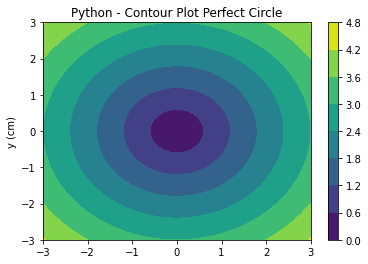

In [9]:
# 2 Contour Chart
# The previous chart wasn't "Pretty" so I used generic data from a tutorial that show a perfect circle plot
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Python - Contour Plot Perfect Circle')
ax.set_ylabel('y (cm)')
plt.show()
# from https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm




